In [69]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [70]:
power_data = pd.read_csv('Data_for_UCI_named.csv')

In [71]:
power_data.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [72]:
power_data.shape

(10000, 14)

In [74]:
power_data.isnull().sum()

tau1     0
tau2     0
tau3     0
tau4     0
p1       0
p2       0
p3       0
p4       0
g1       0
g2       0
g3       0
g4       0
stab     0
stabf    0
dtype: int64

In [75]:
power_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tau1    10000 non-null  float64
 1   tau2    10000 non-null  float64
 2   tau3    10000 non-null  float64
 3   tau4    10000 non-null  float64
 4   p1      10000 non-null  float64
 5   p2      10000 non-null  float64
 6   p3      10000 non-null  float64
 7   p4      10000 non-null  float64
 8   g1      10000 non-null  float64
 9   g2      10000 non-null  float64
 10  g3      10000 non-null  float64
 11  g4      10000 non-null  float64
 12  stab    10000 non-null  float64
 13  stabf   10000 non-null  object 
dtypes: float64(13), object(1)
memory usage: 1.1+ MB


In [76]:
# As stab and stabf describe the stability feature of the system we will drop the stab feature and work with stabf.
power_data = power_data.drop('stab', axis=1)

In [77]:
power_data.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,unstable


In [78]:
# value count for target variables
power_data['stabf'].value_counts()

unstable    6380
stable      3620
Name: stabf, dtype: int64

In [79]:
# select train and test set data
x = power_data.drop(columns='stabf')
y= power_data['stabf']

In [80]:
x.shape, y.shape

((10000, 12), (10000,))

In [82]:
#split the data into training and testing sets

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

print('X_train shape: {}'.format(x_train.shape))
print('y_train shape: {}'.format(y_train.shape))
print('X_test shape: {}'.format(x_test.shape))
print('y_test shape: {}'.format(y_test.shape))

X_train shape: (8000, 12)
y_train shape: (8000,)
X_test shape: (2000, 12)
y_test shape: (2000,)


In [83]:
#Use the standard scaler to transform the x_train and x_test.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

normalised_train_df = pd.DataFrame(scaler.fit_transform(x_train), columns = x_train.columns)
normalised_test_df = pd.DataFrame(scaler.transform(x_test), columns = x_test.columns)


In [84]:
##import all the classifiers required and the metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import recall_score, classification_report, accuracy_score, precision_score, f1_score, confusion_matrix

Question 1

RandomForestClassifier

In [85]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state = 1)

#fit on train set
rfc.fit(normalised_train_df, y_train)

RandomForestClassifier(random_state=1)

In [86]:
#make prediction on test data
rfc_pred = rfc.predict(normalised_test_df)
rfc_pred

array(['unstable', 'unstable', 'stable', ..., 'stable', 'stable',
       'unstable'], dtype=object)

Measure Model Performance for RandomForestClassifier

Question 14

In [88]:
#model accuracy
accuracy = accuracy_score(y_test, rfc_pred)
print('Accuracy: {}'.format(round(accuracy*100), 4))
print('Accuracy: {}'.format(round(accuracy_score(y_test, rfc_pred), 5)))

Accuracy: 93
Accuracy: 0.929


In [89]:
# precision
precision = precision_score(y_test, rfc_pred, pos_label='stable')
print('Precision Score: {}'.format(round(precision*100), 4))

Precision Score: 92


In [90]:
# recall
recall = recall_score(y_test, rfc_pred, pos_label='stable')
print('Recall Score: {}'.format(round(recall*100), 4))

Recall Score: 88


In [91]:
# F1 Score
f1 = f1_score(y_test, rfc_pred, pos_label='stable')
print('F1 Score: {}'.format(round(f1*100), 4))

F1 Score: 90


In [93]:
# classification report
print('Classification Report:\n', classification_report(y_test,rfc_pred, digits =3))

Classification Report:
               precision    recall  f1-score   support

      stable      0.919     0.878     0.898       712
    unstable      0.934     0.957     0.946      1288

    accuracy                          0.929      2000
   macro avg      0.927     0.918     0.922      2000
weighted avg      0.929     0.929     0.929      2000



In [94]:
print("Training set score: {:.3f}".format(rfc.score(normalised_train_df, y_train)))

Training set score: 1.000


In [95]:
#confusion matrix
rfc_cnf_mat = confusion_matrix(y_test, rfc_pred, labels=['unstable', 'stable'])
print('Confusion Matrix:\n', rfc_cnf_mat)
     

Confusion Matrix:
 [[1233   55]
 [  87  625]]


Question 15

XGBoostClassifier

In [96]:
from xgboost import XGBClassifier

xgc= XGBClassifier(random_state = 1)

#fit on train set
xgc.fit(normalised_train_df, y_train)


XGBClassifier(random_state=1)

In [98]:
xgc_pred = xgc.predict(normalised_test_df)
xgc_pred

array(['unstable', 'unstable', 'stable', ..., 'stable', 'unstable',
       'unstable'], dtype=object)

Measure Model Performance for XGBClassifier

In [99]:
#model accuracy
xg_accuracy = accuracy_score(y_test, xgc_pred)
print('Accuracy: {}'.format(round(xg_accuracy*100), 4))
print('Accuracy: {}'.format(round(accuracy_score(y_test, xgc_pred), 4)))

# precision
xg_precision = precision_score(y_test, xgc_pred, pos_label='stable')
print('Precision Score: {}'.format(round(xg_precision*100), 4))

# recall
xg_recall = recall_score(y_test, xgc_pred, pos_label='stable')
print('Recall Score: {}'.format(round(xg_recall*100), 4))

# F1 Score
xg_f1 = f1_score(y_test, xgc_pred, pos_label='stable')
print('F1 Score: {}'.format(round(xg_f1*100), 4))

# classification report
print('Classification Report:\n', classification_report(y_test,xgc_pred, digits =3))

#confusion matrix
xg_cnf_mat = confusion_matrix(y_test, xgc_pred)
print('Confusion Matrix:\n', xg_cnf_mat)

Accuracy: 92
Accuracy: 0.9195
Precision Score: 92
Recall Score: 85
F1 Score: 88
Classification Report:
               precision    recall  f1-score   support

      stable      0.921     0.847     0.882       712
    unstable      0.919     0.960     0.939      1288

    accuracy                          0.919      2000
   macro avg      0.920     0.903     0.911      2000
weighted avg      0.920     0.919     0.919      2000

Confusion Matrix:
 [[ 603  109]
 [  52 1236]]


In [100]:
print("Training set score: {:.3f}".format(xgc.score(normalised_train_df, y_train)))
print("Test set score: {:.3f}".format(xgc.score(normalised_test_df, y_test)))

Training set score: 0.952
Test set score: 0.919


LightGBM Classifier

Question 16

In [101]:
from lightgbm import LGBMClassifier

lgbclass= LGBMClassifier(random_state = 1)

#fit on train set
lgbclass.fit(normalised_train_df, y_train)

LGBMClassifier(random_state=1)

In [102]:
#make prediction on test data
lgbclass_pred = lgbclass.predict(normalised_test_df)
lgbclass_pred

array(['unstable', 'unstable', 'stable', ..., 'stable', 'unstable',
       'unstable'], dtype=object)

Measure Model Performance for LGBMClassifier

In [103]:
#model accuracy
lgb_accuracy = accuracy_score(y_test, lgbclass_pred)
print('Accuracy: {}'.format(round(lgb_accuracy*100), 4))
print('Accuracy: {}'.format(round(accuracy_score(y_test, lgbclass_pred), 4)))

# precision
lgb_precision = precision_score(y_test, lgbclass_pred, pos_label='stable')
print('Precision Score: {}'.format(round(lgb_precision*100), 4))

# recall
lgb_recall = recall_score(y_test, lgbclass_pred, pos_label='stable')
print('Recall Score: {}'.format(round(lgb_recall*100), 4))

# F1 Score
lgb_f1 = f1_score(y_test, lgbclass_pred, pos_label='stable')
print('F1 Score: {}'.format(round(lgb_f1*100), 4))

# classification report
print('Classification Report:\n', classification_report(y_test,lgbclass_pred, digits =3))

#confusion matrix
lgb_cnf_mat = confusion_matrix(y_test, lgbclass_pred)
print('Confusion Matrix:\n', lgb_cnf_mat)

Accuracy: 94
Accuracy: 0.9375
Precision Score: 93
Recall Score: 89
F1 Score: 91
Classification Report:
               precision    recall  f1-score   support

      stable      0.930     0.892     0.910       712
    unstable      0.942     0.963     0.952      1288

    accuracy                          0.938      2000
   macro avg      0.936     0.927     0.931      2000
weighted avg      0.937     0.938     0.937      2000

Confusion Matrix:
 [[ 635   77]
 [  48 1240]]


In [104]:
print("Training set score: {:.3f}".format(lgbclass.score(normalised_train_df, y_train)))
print("Test set score: {:.3f}".format(lgbclass.score(normalised_test_df, y_test)))

Training set score: 0.998
Test set score: 0.938


Question 17 and 18: From cell 14 to cell 17

ExtraTreeClassifier

In [105]:
from sklearn.ensemble import ExtraTreesClassifier

exc = ExtraTreesClassifier(random_state = 1)

#fit on the train set
exc.fit(normalised_train_df, y_train)

ExtraTreesClassifier(random_state=1)

In [106]:
#make prediction on test data
exc_pred = exc.predict(normalised_test_df)
exc_pred

array(['unstable', 'unstable', 'stable', ..., 'stable', 'unstable',
       'unstable'], dtype=object)

Measure Model Performance for ExtraTreesClassifier

In [107]:
#model accuracy
exc_accuracy = accuracy_score(y_test, exc_pred)
print('Accuracy: {}'.format(round(exc_accuracy*100), 4))
print('Accuracy: {}'.format(round(accuracy_score(y_test, exc_pred), 4)))

# precision
exc_precision = precision_score(y_test, exc_pred, pos_label='stable')
print('Precision Score: {}'.format(round(exc_precision*100), 4))

# recall
exc_recall = recall_score(y_test, exc_pred, pos_label='stable')
print('Recall Score: {}'.format(round(exc_recall*100), 4))

# F1 Score
exc_f1 = f1_score(y_test, exc_pred, pos_label='stable')
print('F1 Score: {}'.format(round(exc_f1*100), 4))

# classification report
print('Classification Report:\n', classification_report(y_test, exc_pred, digits =3))

#confusion matrix
exc_cnf_mat = confusion_matrix(y_test, exc_pred)
print('Confusion Matrix:\n', exc_cnf_mat)

Accuracy: 93
Accuracy: 0.928
Precision Score: 94
Recall Score: 85
F1 Score: 89
Classification Report:
               precision    recall  f1-score   support

      stable      0.941     0.851     0.894       712
    unstable      0.922     0.970     0.946      1288

    accuracy                          0.928      2000
   macro avg      0.931     0.911     0.920      2000
weighted avg      0.929     0.928     0.927      2000

Confusion Matrix:
 [[ 606  106]
 [  38 1250]]


In [108]:
print("Training set score: {:.3f}".format(exc.score(normalised_train_df, y_train)))
print("Test set score: {:.3f}".format(exc.score(normalised_test_df, y_test)))

Training set score: 1.000
Test set score: 0.928


Improving ExtraTreesClassifier

In [109]:
#combination of hyperparameters
n_estimators = [50, 100, 300, 500, 1000]

min_samples_split = [2, 3, 5, 7, 9]

min_samples_leaf = [1, 2, 4, 6, 8]

max_features = ['auto', 'sqrt', 'log2', None] 

hyperparameter_grid = {'n_estimators': n_estimators,

                       'min_samples_leaf': min_samples_leaf,

                       'min_samples_split': min_samples_split,

                       'max_features': max_features}

In [110]:
from sklearn.model_selection import RandomizedSearchCV

#exc = ExtraTreesClassifier(random_state = 1)

#set up randomsearch with 5folds

ramcv = RandomizedSearchCV(estimator = exc, 
                              param_distributions = hyperparameter_grid, cv=5, n_iter=10, scoring = 'accuracy', n_jobs = -1, verbose = 1,
                              random_state = 1)

In [111]:
#fit on the training data
search = ramcv.fit(normalised_train_df, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [112]:
#get best parameters
search.best_params_
     

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 8,
 'max_features': None}

In [113]:
##train the dataset using tree model with the best paraneters
tree = ExtraTreesClassifier(**search.best_params_, random_state = 1)
tree.fit(normalised_train_df, y_train)
predict5 = tree.predict(normalised_test_df)
print('Predict: {}'.format(predict5))
print('Accuracy: {}'.format(accuracy_score(y_test, predict5)))

Predict: ['unstable' 'unstable' 'stable' ... 'stable' 'unstable' 'unstable']
Accuracy: 0.927


In [114]:
normalised_train_df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4
0,0.367327,-0.986042,0.650447,1.547527,-0.291490,0.061535,1.293862,-0.845074,0.160918,0.339859,0.585568,0.492239
1,-0.064659,0.089437,1.035079,-1.641494,0.619865,-0.067235,-1.502925,0.486613,-0.293143,-1.558488,1.429649,-1.443521
2,-1.467850,1.298418,-0.502536,1.166046,-0.180521,0.490603,0.682560,-0.855302,1.399350,1.451534,-1.045743,0.492489
3,0.820081,0.529920,1.299657,-1.141975,-0.812854,-0.763632,1.521579,0.658780,-0.958319,1.361958,1.604140,0.275303
4,0.665424,-1.425627,0.312300,0.919137,-1.614296,0.760315,1.422019,0.639243,1.676895,0.695660,1.137504,-1.312575


In [115]:
#get best score
search.best_score_

0.9241249999999999

Question 20

In [117]:
def get_feature_importance(model, feat, col_name):
  #this function returns the importance of every feature
  importance = pd.Series(model.feature_importances_, feat.columns).sort_values()
  importance_df = pd.DataFrame(importance).reset_index()
  importance_df.columns = ['Features', col_name]
  importance_df[col_name].round(3)
  return importance_df

In [118]:
feature_importance = get_feature_importance(tree, normalised_train_df, 'Feature_Importance')
feature_importance

,Features,Feature_Importance
0,p1,0.003683
1,p4,0.004962
2,p2,0.005337
3,p3,0.005429
4,g1,0.102562
5,g2,0.107578
6,g4,0.109541
7,g3,0.113063
8,tau3,0.134680
9,tau4,0.135417


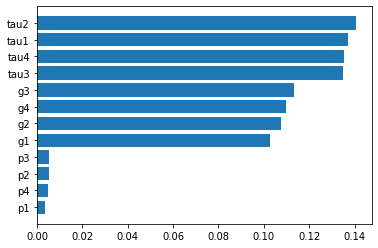

In [120]:
plt.barh(feature_importance.Features, feature_importance.Feature_Importance)
plt.show()

In [121]:
#classification report
print('Classification Report:\n', classification_report(y_test,predict5, digits =4))

Classification Report:
               precision    recall  f1-score   support

      stable     0.9211    0.8694    0.8945       712
    unstable     0.9300    0.9589    0.9442      1288

    accuracy                         0.9270      2000
   macro avg     0.9256    0.9141    0.9193      2000
weighted avg     0.9268    0.9270    0.9265      2000

